<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module3_Part5R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 | Part 5 R: Data Verb - JOIN()


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 3.5.R
For this notebook, we will consider a total of three datasets. 

*   MNSchools_ACT.csv - contains information on ACT Scores for MN schools
*   MNSchools_Information.csv - contains key information for MN schools
*   ACS2019_CensusData_SchoolLevel.csv - contains census information (American Community Survey) by school district for MN schools
 
<br>Data Sources: 
*   MNSchools_ACT: https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=87
*   MNSchools_Information: https://public.education.mn.gov/MdeOrgView/search/tagged/MDEORG_DISTRICT_SCHOOL
*   ACS2019_CensusData_SchoolLevel:  https://gisdata.mn.gov/dataset/us-mn-state-metc-society-census-acs 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>


To begin, load the three data filesinto the sample_data directory.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1fB9VLraWPuHbcH5tajI6Erj6NS2FCDmo"></p>


To begin, the <strong>tidyverse</strong> package will be used throughout this notebook; thus, load this package.

In [ ]:
library(tidyverse)

### Preparing the ACT File

To being, read in the MNSchools_ACT data file without specification of the data types.



In [ ]:
MN_ACT<-read_csv('/content/sample_data/MNSchools_ACT.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  ACTID = col_double(),
  DistrictName = col_character(),
  SchoolName = col_character(),
  Year = col_double(),
  NumberTookACT = col_double(),
  English = col_double(),
  Math = col_double(),
  Reading = col_double(),
  Science = col_double(),
  Score = col_double()
)




Check the strucuture of the dataframe -- including the data types for each variable.

In [ ]:
#Using str() to investigate the structure of this dataframe.
 str(MN_ACT) 

spec_tbl_df [3,860 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ACTID        : num [1:3860] 247550 247550 247550 247550 247550 ...
 $ DistrictName : chr [1:3860] "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" ...
 $ SchoolName   : chr [1:3860] "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" ...
 $ Year         : num [1:3860] 2015 2016 2017 2018 2019 ...
 $ NumberTookACT: num [1:3860] 28 40 24 27 28 0 0 0 7 1 ...
 $ English      : num [1:3860] 21.1 20.6 20.3 21.3 22.1 NA NA NA NA NA ...
 $ Math         : num [1:3860] 21.2 20.6 20 21.3 20.9 NA NA NA NA NA ...
 $ Reading      : num [1:3860] 22.5 21.6 22.3 22.3 22.6 NA NA NA NA NA ...
 $ Science      : num [1:3860] 21.9 21.4 21.8 20.4 22.6 NA NA NA NA NA ...
 $ Score        : num [1:3860] 21.9 21.2 21.2 21.4 22.1 NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   ACTID = col_double(),
  ..   Distric

<strong>Comments</strong>:

*    ACTID will be used as a <strong>key</strong> variable for upcoming JOINs. For these data files it will be best to have ACTID specifed as a string (i.e. character type).
*    Year will be specifed as character as well as it simply indicates one of five levels in this dataframe.

The following modification can be made to the read_csv() function to allow for specification of particular data type for a variable.

<p align="center">
<font size="+2">
read_csv( <i>file</i>, col_types = cols( <i>variable name</i> = <i>data type</i>) )
</font>
</p>



The following is a list of possible specificiations for variables that are avaiable when using read_csv from the tidyverse / readr package.
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1QVOuCBYd5rnWUQF0Jf92A2jCWvU4Wu3k"></p>

Read in the MNSchools_ACT data file with column specifications for ACTID and Year.

*    ACTID specify as character (i.e. string)
*    Year specifiy as character (i.e. string)


In [ ]:
#Read in MNSchools_ACT with data type specification for ACTID and Year
MN_ACT<-read_csv('/content/sample_data/MNSchools_ACT.csv', col_types = cols(ACTID = col_character(), Year = col_character()))

Quick check to make sure the specifications were successful.

In [ ]:
#Using str() to investigate the structure of this dataframe.
 str(MN_ACT) 

spec_tbl_df [3,860 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ACTID        : chr [1:3860] "247550" "247550" "247550" "247550" ...
 $ DistrictName : chr [1:3860] "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" "ADA-BORUP SCHOOL DISTRICT 2854" ...
 $ SchoolName   : chr [1:3860] "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" "ADA-BORUP HIGH SCHOOL" ...
 $ Year         : chr [1:3860] "2015" "2016" "2017" "2018" ...
 $ NumberTookACT: num [1:3860] 28 40 24 27 28 0 0 0 7 1 ...
 $ English      : num [1:3860] 21.1 20.6 20.3 21.3 22.1 NA NA NA NA NA ...
 $ Math         : num [1:3860] 21.2 20.6 20 21.3 20.9 NA NA NA NA NA ...
 $ Reading      : num [1:3860] 22.5 21.6 22.3 22.3 22.6 NA NA NA NA NA ...
 $ Science      : num [1:3860] 21.9 21.4 21.8 20.4 22.6 NA NA NA NA NA ...
 $ Score        : num [1:3860] 21.9 21.2 21.2 21.4 22.1 NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   ACTID = col_character(),
  ..   

Taking a look at the first few rows of the dataframe.

In [ ]:
#Looking at first fews rows of data
dim(MN_ACT)
head(MN_ACT)

[1] 3860   10

ACTID,DistrictName,SchoolName,Year,NumberTookACT,English,Math,Reading,Science,Score
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247550,ADA-BORUP SCHOOL DISTRICT 2854,ADA-BORUP HIGH SCHOOL,2015,28,21.1,21.2,22.5,21.9,21.9
247550,ADA-BORUP SCHOOL DISTRICT 2854,ADA-BORUP HIGH SCHOOL,2016,40,20.6,20.6,21.6,21.4,21.2
247550,ADA-BORUP SCHOOL DISTRICT 2854,ADA-BORUP HIGH SCHOOL,2017,24,20.3,20.0,22.3,21.8,21.2
247550,ADA-BORUP SCHOOL DISTRICT 2854,ADA-BORUP HIGH SCHOOL,2018,27,21.3,21.3,22.3,20.4,21.4
247550,ADA-BORUP SCHOOL DISTRICT 2854,ADA-BORUP HIGH SCHOOL,2019,28,22.1,20.9,22.6,22.6,22.1
247180,ROSEMOUNT-APPLE VLY-EAGAN 196,DAKOTA RIDGE SCHOOL,2015,0,NA,NA,NA,NA,NA


Data Task #1:

*    Use only the most recent ACT Scores, i.e. Year == "2019"
*    Ignore any schools that do not have ACT scores included (schools must have 10 or more students take ACT to have their ACT scores included).
*    Additional rows are included under the name "All Schools" these rows should not be included.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1hRwVeJYEKcp6BtGvVmgSQko0dH04VVmE"></p>

Getting the desired data.  Keep only the following columns in this table -- ACTID, SchoolName, Year, NumberTookACT, and Score.

In [ ]:
#Getting desired data
(
  MN_ACT
  %>% filter(Year == "2019")
  %>% filter(SchoolName != "All Schools")
  %>% drop_na() 
  %>% select(ACTID, SchoolName, Year, NumberTookACT, Score)
 ) -> MN_ACT_2019

 dim(MN_ACT_2019)
 head(MN_ACT_2019)


[1] 387   5

ACTID,SchoolName,Year,NumberTookACT,Score
<chr>,<chr>,<chr>,<dbl>,<dbl>
247550,ADA-BORUP HIGH SCHOOL,2019,28,22.1
247524,SOUTHLAND SENIOR HIGH SCHOOL,2019,36,19.1
247544,ADRIAN HIGH SCHOOL,2019,49,20.4
247002,AITKIN HIGH SCHOOL,2019,78,19.6
247788,ALBANY AREA HIGH SCHOOL,2019,107,21.1
247246,ALBERT LEA SENIOR HIGH SCHOOL,2019,192,19.1


###  Preparing the MN School Information Data

To begin, lets read in the MNSChools_Information data file with the default data types.

In [ ]:
MN_SchoolInfo <- read_csv('/content/sample_data/MNSchools_Information.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  DistrictNumber = col_double(),
  DistrictType = col_double(),
  SchoolNumber = col_double(),
  MNSchoolID = col_character(),
  SchoolName = col_character(),
  Address = col_character(),
  City = col_character(),
  State = col_character(),
  Zipcode = col_character(),
  County = col_character(),
  Grades = col_character(),
  NCESID = col_double(),
  StateOrganizationId = col_double(),
  ACTID = col_double()
)




In this data file there are various fields that will be used as <strong>key</strong> fields.  Upcoming JOINs will be accomplished more easily if these are specifed as character (i.e. strings).

*   DistrictNumber + DistrictType + SchoolNumber combination can be used to uniquely identify a school in MN
*   NECSID is a nataional code that can be used to uniquely identify school districts
*   StateOrganizationID is a secondary key that can be used to uniquely identify schools in MN
*   ACTID is an code used to uniquely identify schools in regards to their ACT Scores.

In [ ]:
#Read in the MNSchool_Information data file and specify ALL fields as character (i.e. strings)
MN_SchoolInfo <- read_csv('/content/sample_data/MNSchools_Information.csv', col_types = cols(.default = "c"))

Taking a quick look to ensure all variables are indeed characters (i.e. strings).

In [ ]:
#Looking at the structure of this dataframe
str(MN_SchoolInfo)

spec_tbl_df [3,924 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DistrictNumber     : chr [1:3924] "1" "1" "1" "1" ...
 $ DistrictType       : chr [1:3924] "1" "1" "1" "1" ...
 $ SchoolNumber       : chr [1:3924] "0" "1" "2" "6" ...
 $ MNSchoolID         : chr [1:3924] "0001-01" "0001-01-001" "0001-01-002" "0001-01-006" ...
 $ SchoolName         : chr [1:3924] "Aitkin Public School District" "Aitkin Secondary School" "Rippleside Elementary" "Aitkin Alternative Learning Program" ...
 $ Address            : chr [1:3924] "306 2nd St NW" "306 2nd St NW" "225 2nd Ave SW" "12 7th St NW" ...
 $ City               : chr [1:3924] "Aitkin" "Aitkin" "Aitkin" "Aitkin" ...
 $ State              : chr [1:3924] "MN" "MN" "MN" "MN" ...
 $ Zipcode            : chr [1:3924] "56431-1289" "56431" "56431" "56431" ...
 $ County             : chr [1:3924] "Aitkin County, MN" "Aitkin County, MN" "Aitkin County, MN" "Aitkin County, MN" ...
 $ Grades             : chr [1:3924] NA "7-12" "EC-6" "7-12" ...
 $ 

Taking a quick look at this data.

In [ ]:
#Getting the dimension and looking at a few rows
dim(MN_SchoolInfo)
head(MN_SchoolInfo, 25)

[1] 3924   14

DistrictNumber,DistrictType,SchoolNumber,MNSchoolID,SchoolName,Address,City,State,Zipcode,County,Grades,NCESID,StateOrganizationId,ACTID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,0001-01,Aitkin Public School District,306 2nd St NW,Aitkin,MN,56431-1289,"Aitkin County, MN",NA,2702760,10001000000,247002
1,1,1,0001-01-001,Aitkin Secondary School,306 2nd St NW,Aitkin,MN,56431,"Aitkin County, MN",7-12,270276000057,10001001000,240020
1,1,2,0001-01-002,Rippleside Elementary,225 2nd Ave SW,Aitkin,MN,56431,"Aitkin County, MN",EC-6,270276000059,10001002000,NA
1,1,6,0001-01-006,Aitkin Alternative Learning Program,12 7th St NW,Aitkin,MN,56431,"Aitkin County, MN",7-12,270276002789,10001006000,NA
1,1,8,0001-01-008,Aitkin ESY,306 2nd St NW,Aitkin,MN,56431,"Aitkin County, MN",1-12,2702760,10001008000,NA
1,1,8,0001-01-008,Aitkin ESY,306 2nd St NW,Aitkin,MN,56431,"Aitkin County, MN",1-12,2702760,10001008000,NA
2,1,0,0002-01,Hill City Public School District,500 Ione Ave,Hill City,MN,55748-9628,"Aitkin County, MN",NA,2714010,10002000000,247004
2,1,1,0002-01-001,Hill City Elementary,500 Ione Ave,Hill City,MN,55748,"Aitkin County, MN",EC+KG-4,271401000723,10002001000,NA
2,1,2,0002-01-002,Hill City Middle School,500 Ione Ave,Hill City,MN,55748-9628,"Aitkin County, MN",5-8,271401004653,10002002000,NA


Data Task #2:

*   The MN_SchoolInfo dataframe as information for all schools -- only include schools that have an ACTID (i.e. high schools).
*   In addition to each school, each school <i>district</i> as a different and unique ACTID.  The goal is to compare at the school level (not at the district leve); thus, filter out district information (i.e. filter out rows for which SchoolType == "0").



In [ ]:
#Getting desired data
(
  MN_SchoolInfo
  %>% drop_na(ACTID) 
  #%>% filter(SchoolNumber != "0")
  %>% select(DistrictNumber, DistrictType, SchoolNumber, MNSchoolID, SchoolName, NCESID, ACTID)
 ) -> MN_SchoolInfo_ACTJoin

 dim(MN_SchoolInfo_ACTJoin)
 head(MN_SchoolInfo_ACTJoin, 20)

[1] 984   7

DistrictNumber,DistrictType,SchoolNumber,MNSchoolID,SchoolName,NCESID,ACTID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,0001-01,Aitkin Public School District,2702760,247002
1,1,1,0001-01-001,Aitkin Secondary School,270276000057,240020
2,1,0,0002-01,Hill City Public School District,2714010,247004
2,1,3,0002-01-003,Hill City Senior High,271401000724,241105
4,1,0,0004-01,McGregor Public School District,2719170,247006
4,1,40,0004-01-040,McGregor Secondary,271917000904,241530
11,1,0,0011-01,Anoka-Hennepin Public School District,2703180,247008
11,1,1,0011-01-001,Anoka High School,270318000096,240080
11,1,2,0011-01-002,Coon Rapids High School,270318000100,240537


Data Task #3

*    The next thing that must be done is to reduce the NCESID field down to the <i>seven leftmost characters</i>.  The full NCESID field in this data file contains information down to the school level.  However, the census data only includes information down at the district level.



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1KidNIOJ4O1GbJWdVWfBGsCGbpeLuo1Ye"></p>

In [ ]:
#Getting an updated NCESID for the JOIN with census data
(
  MN_SchoolInfo_ACTJoin
  %>% mutate(NCESID_ACT = str_sub(NCESID, 1,7) )
  %>% select(ACTID, NCESID_ACT)
) -> MN_SchoolInfo_ACTJoin

 dim(MN_SchoolInfo_ACTJoin)
 head(MN_SchoolInfo_ACTJoin)

[1] 984   2

ACTID,NCESID_ACT
<chr>,<chr>
247002,2702760
240020,2702760
247004,2714010
241105,2714010
247006,2719170
241530,2719170


### JOIN -- Put the NCESID into ACT data

The JOIN done here will bring the NCESID into the ACT dataframe.  This is needed to complete the JOIN with the Census data.

In [ ]:
#Complete the JOIN
(
   MN_ACT_2019
   %>% left_join(MN_SchoolInfo_ACTJoin, by="ACTID")
   %>% rename(NCESID = NCESID_ACT)
) -> MN_ACT_2019

 dim(MN_ACT_2019)
 head(MN_ACT_2019)


[1] 406   6

ACTID,SchoolName,Year,NumberTookACT,Score,NCESID
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
247550,ADA-BORUP HIGH SCHOOL,2019,28,22.1,2700126
247524,SOUTHLAND SENIOR HIGH SCHOOL,2019,36,19.1,2702720
247544,ADRIAN HIGH SCHOOL,2019,49,20.4,2702730
247002,AITKIN HIGH SCHOOL,2019,78,19.6,2702760
247788,ALBANY AREA HIGH SCHOOL,2019,107,21.1,2702930
247246,ALBERT LEA SENIOR HIGH SCHOOL,2019,192,19.1,2702970


### Prepare the Census Data

In [ ]:
#Read in the MNSchool_Information data file and specify ALL fields as character (i.e. strings)
Census_MNSchools <- read_csv('/content/sample_data/ACS2019_CensusData_SchoolLevel.csv', col_types = cols(NCESID = col_character()))

Taking a quick look at the struture to ensure NCESID is character.

In [ ]:
str(Census_MNSchools)

spec_tbl_df [353 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ NCESID               : chr [1:353] "2700001" "2700005" "2700006" "2700007" ...
 $ GeographicUnit       : chr [1:353] "SCHLDIST" "SCHLDIST" "SCHLDIST" "SCHLDIST" ...
 $ SchoolDistrictName   : chr [1:353] "Mountain Iron-Buhl School District Minnesota" "United South Central School District Minnesota" "Maple River School District Minnesota" "Kingsland Public School District Minnesota" ...
 $ Source               : chr [1:353] "ACS 2015-2019" "ACS 2015-2019" "ACS 2015-2019" "ACS 2015-2019" ...
 $ Year                 : num [1:353] 2019 2019 2019 2019 2019 ...
 $ Population           : num [1:353] 4545 5790 5991 5023 17435 ...
 $ HouseholdSize        : num [1:353] 2.1 2.34 2.45 2.3 2.15 2.41 2.54 2.15 2.21 2.35 ...
 $ WhiteNH              : num [1:353] 4232 5227 5657 4760 15671 ...
 $ BlackNH              : num [1:353] 63 10 26 7 71 21 40 32 30 68 ...
 $ AmerIndianNH         : num [1:353] 45 20 6 0 906 0 59 28 32 43 ...
 $ Asi

### JOIN  - Create Join between ACT Data with Census Data

For this first JOIN, let's bring in the PovertyPCT from the Census data.

In [ ]:
#Complete the JOIN
(
   MN_ACT_2019
   %>% left_join(select(Census_MNSchools, NCESID, PovertyPct), by="NCESID")
) -> MN_ACT_Census

dim(MN_ACT_Census)
head(MN_ACT_Census)

[1] 406   7

ACTID,SchoolName,Year,NumberTookACT,Score,NCESID,PovertyPct
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
247550,ADA-BORUP HIGH SCHOOL,2019,28,22.1,2700126,0.074
247524,SOUTHLAND SENIOR HIGH SCHOOL,2019,36,19.1,2702720,0.070
247544,ADRIAN HIGH SCHOOL,2019,49,20.4,2702730,0.080
247002,AITKIN HIGH SCHOOL,2019,78,19.6,2702760,0.111
247788,ALBANY AREA HIGH SCHOOL,2019,107,21.1,2702930,0.051
247246,ALBERT LEA SENIOR HIGH SCHOOL,2019,192,19.1,2702970,0.122


### Summaries - Outlier Detection

For simplicity, let's create a reduced dataframe that will be used for plotting and outlier detection.

In [ ]:
#Simple scatterplot
plotting_df <- data.frame(School = MN_ACT_Census$SchoolName, PovertyPct = MN_ACT_Census$PovertyPct, ACT_Score = MN_ACT_Census$Score)
plotting_df <- na.omit(plotting_df)

head(plotting_df)

,School,PovertyPct,ACT_Score
,<chr>,<dbl>,<dbl>
1,ADA-BORUP HIGH SCHOOL,0.074,22.1
2,SOUTHLAND SENIOR HIGH SCHOOL,0.070,19.1
3,ADRIAN HIGH SCHOOL,0.080,20.4
4,AITKIN HIGH SCHOOL,0.111,19.6
5,ALBANY AREA HIGH SCHOOL,0.051,21.1
6,ALBERT LEA SENIOR HIGH SCHOOL,0.122,19.1


Creating a simple scatterplot in R using the plot() function.  In addition, reference lines have been included using the abline() function.

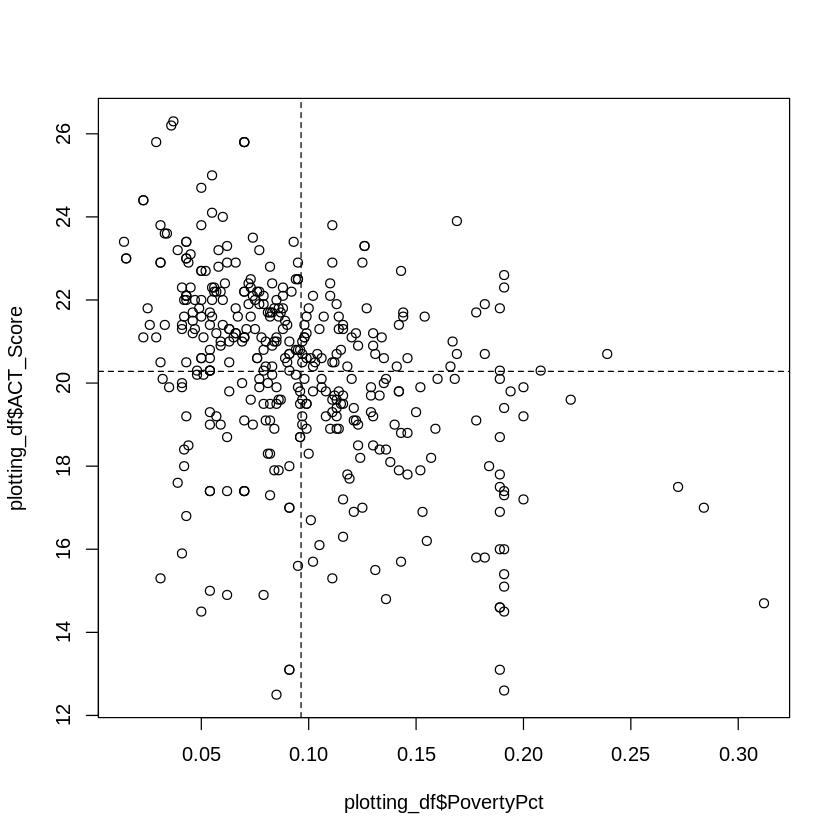

In [ ]:
#Creating a scatterplot with mean lines drawn
plot(plotting_df$PovertyPct, plotting_df$ACT_Score)
abline(v=mean(plotting_df$PovertyPct),lty=2)
abline(h=mean(plotting_df$ACT_Score),lty=2)

Next, we will consider a process to detect outliers.  Data Points that exceed 2 * Std Dev are typically considered outliers.

*    Data Point > Mean + 2 * Std Dev
*    Data Point < Mean - 2  Std Dev

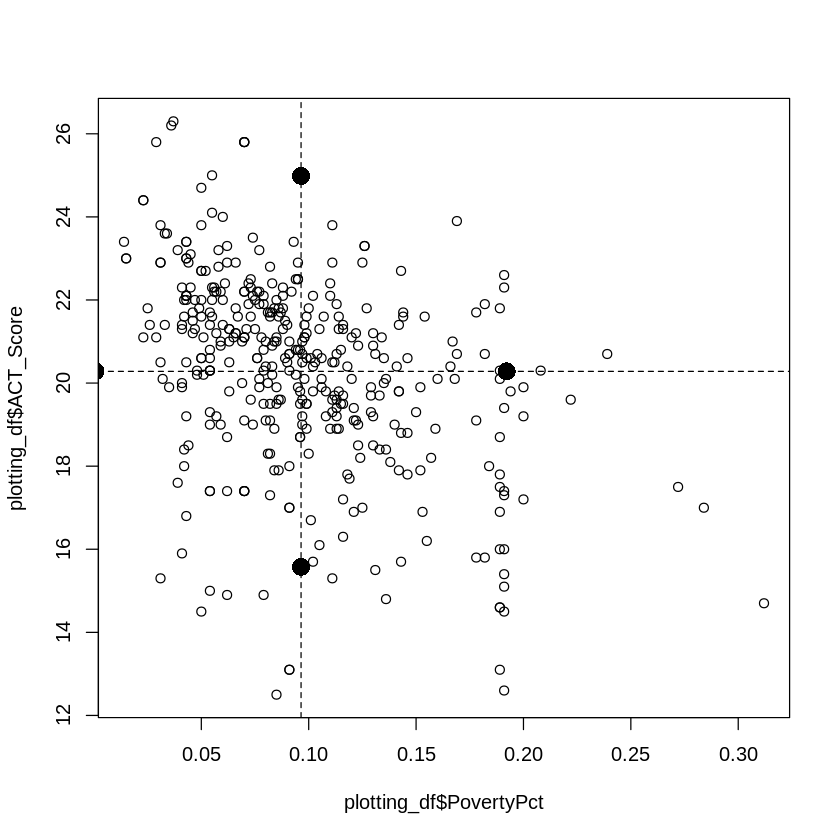

In [ ]:
#Adding points for outliers in each direction
#First, get boundaries
OutlierXHigh <- c(mean(plotting_df$PovertyPct)+2*sqrt(var(plotting_df$PovertyPct)),mean(plotting_df$ACT_Score))
OutlierXLow <- c(mean(plotting_df$PovertyPct)-2*sqrt(var(plotting_df$PovertyPct)),mean(plotting_df$ACT_Score))
OutlierYHigh <- c(mean(plotting_df$PovertyPct),mean(plotting_df$ACT_Score)+2*sqrt(var(plotting_df$ACT_Score)))
OutlierYLow <- c(mean(plotting_df$PovertyPct),mean(plotting_df$ACT_Score)-2*sqrt(var(plotting_df$ACT_Score)))

##Creating a scatterplot with mean lines drawn
plot(plotting_df$PovertyPct, plotting_df$ACT_Score)
abline(v=mean(plotting_df$PovertyPct),lty=2)
abline(h=mean(plotting_df$ACT_Score),lty=2)

#Adding these points to the existing plot u
points(OutlierXHigh[1],OutlierXHigh[2],pch=16,cex=2)
points(OutlierXLow[1],OutlierXLow[2],pch=16,cex=2)
points(OutlierYHigh[1],OutlierYHigh[2],pch=16,cex=2)
points(OutlierYLow[1],OutlierYLow[2],pch=16,cex=2)


Next, draw lines connecting the points.

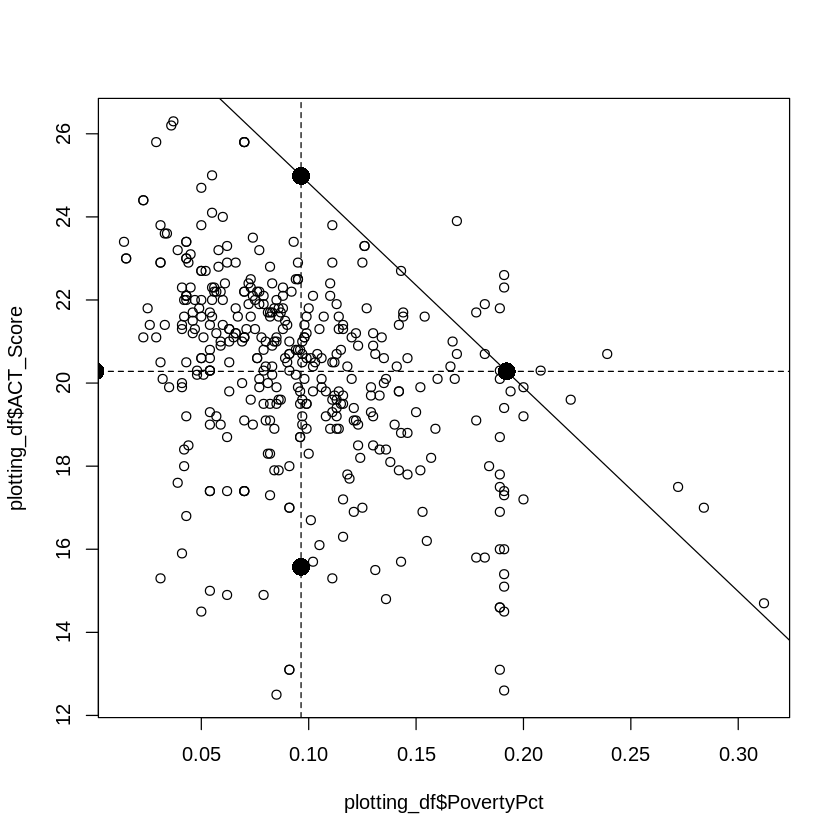

In [ ]:
#Drawing lines for outliers
#First, getting equation of this line for Quandrant #1
Slope_Quadrant1 <- (OutlierYHigh[2] - OutlierXHigh[2])/(OutlierYHigh[1]-OutlierXHigh[1])
Intercept_Quadrant1 <- OutlierYHigh[2] - Slope*OutlierYHigh[1]

##Creating a scatterplot with mean lines drawn
plot(plotting_df$PovertyPct, plotting_df$ACT_Score)
abline(v=mean(plotting_df$PovertyPct),lty=2)
abline(h=mean(plotting_df$ACT_Score),lty=2)

#Adding these points to the existing plot u
points(OutlierXHigh[1],OutlierXHigh[2],pch=16,cex=2)
points(OutlierXLow[1],OutlierXLow[2],pch=16,cex=2)
points(OutlierYHigh[1],OutlierYHigh[2],pch=16,cex=2)
points(OutlierYLow[1],OutlierYLow[2],pch=16,cex=2)

#Adding line for outliers using abline() function
abline(a=Intercept_Quadrant1, b=Slope_Quadrant1)

Next, drawing all four lines.

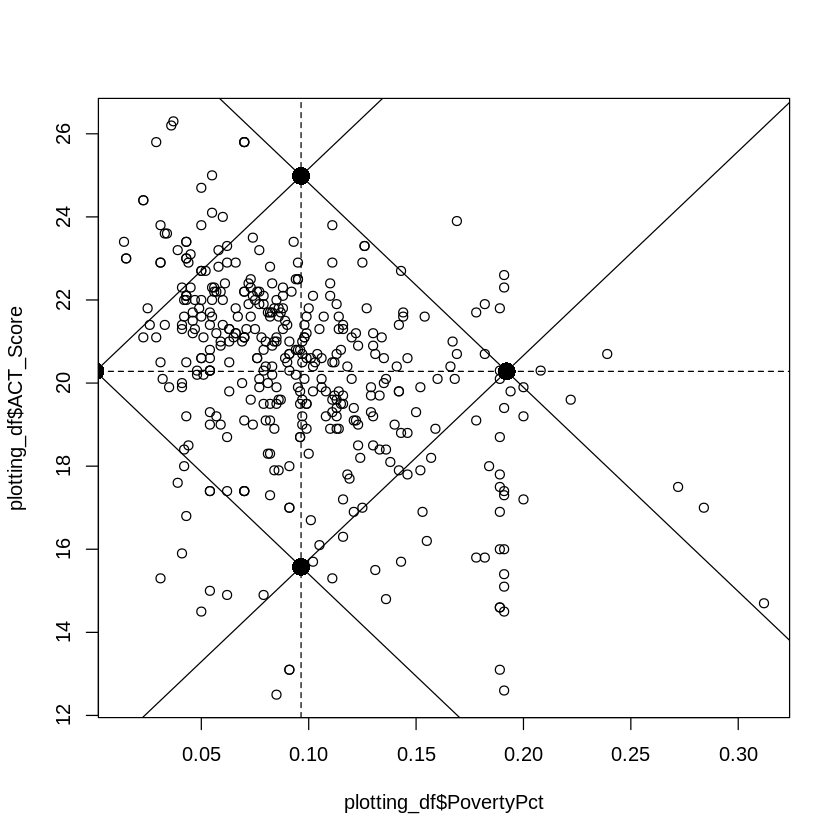

In [ ]:
#Drawing all four lines for outliers
Slope_Quadrant1 <- (OutlierYHigh[2] - OutlierXHigh[2])/(OutlierYHigh[1]-OutlierXHigh[1])
Intercept_Quadrant1 <- OutlierYHigh[2] - Slope*OutlierYHigh[1]



Slope_Quadrant2 <- -1 * Slope_Quadrant1
Intercept_Quadrant2 <- OutlierYHigh[2] + Slope*OutlierYHigh[1]

Slope_Quadrant3 <- Slope_Quadrant1
Intercept_Quadrant3 <-  OutlierYLow[2] - Slope*OutlierYLow[1]

Slope_Quadrant4 <- -1*Slope_Quadrant1
Intercept_Quadrant4 <- OutlierYLow[2] + Slope*OutlierYLow[1]


##Creating a scatterplot with mean lines drawn
plot(plotting_df$PovertyPct, plotting_df$ACT_Score)
abline(v=mean(plotting_df$PovertyPct),lty=2)
abline(h=mean(plotting_df$ACT_Score),lty=2)

#Adding these points to the existing plot u
points(OutlierXHigh[1],OutlierXHigh[2],pch=16,cex=2)
points(OutlierXLow[1],OutlierXLow[2],pch=16,cex=2)
points(OutlierYHigh[1],OutlierYHigh[2],pch=16,cex=2)
points(OutlierYLow[1],OutlierYLow[2],pch=16,cex=2)

#Adding line for outliers using abline() function
abline(a=Intercept_Quadrant1, b=Slope_Quadrant1)
abline(a=Intercept_Quadrant2, b=Slope_Quadrant2)
abline(a=Intercept_Quadrant3, b=Slope_Quadrant3)
abline(a=Intercept_Quadrant4, b=Slope_Quadrant4)


Using the segments() function instead of the abline() function keeps the scatterplot a little cleaner. 

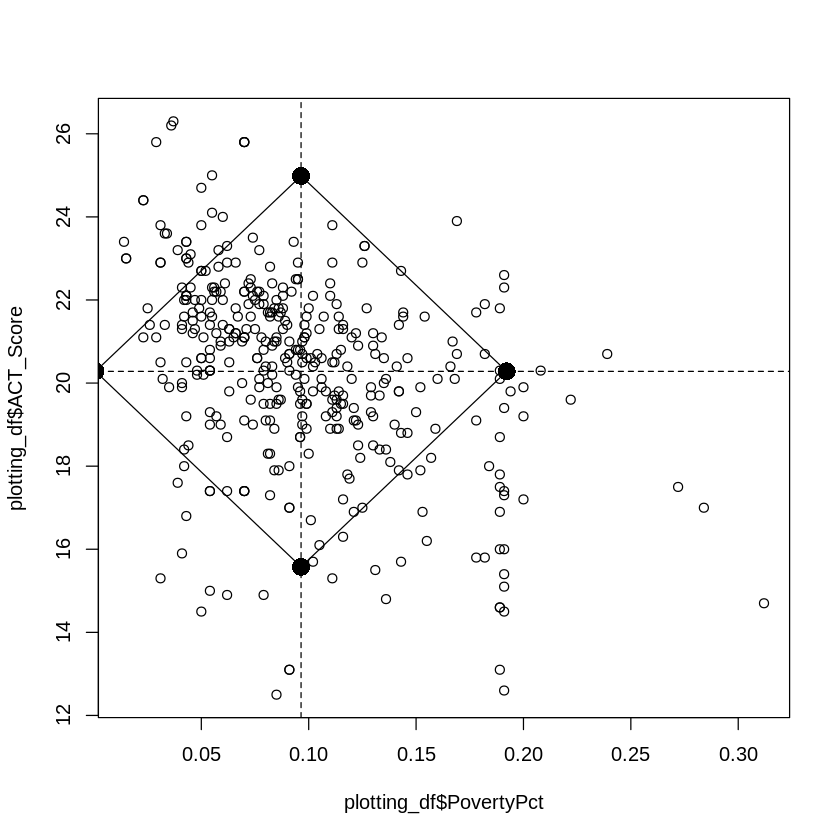

In [ ]:
##Creating a scatterplot with mean lines drawn
plot(plotting_df$PovertyPct, plotting_df$ACT_Score)
abline(v=mean(plotting_df$PovertyPct),lty=2)
abline(h=mean(plotting_df$ACT_Score),lty=2)

#Adding these points to the existing plot u
points(OutlierXHigh[1],OutlierXHigh[2],pch=16,cex=2)
points(OutlierXLow[1],OutlierXLow[2],pch=16,cex=2)
points(OutlierYHigh[1],OutlierYHigh[2],pch=16,cex=2)
points(OutlierYLow[1],OutlierYLow[2],pch=16,cex=2)

#Adding line for outliers using abline() function
segments(OutlierXHigh[1],OutlierXHigh[2],OutlierYHigh[1],OutlierYHigh[2])
segments(OutlierXLow[1],OutlierXLow[2],OutlierYHigh[1],OutlierYHigh[2])
segments(OutlierXLow[1],OutlierXLow[2],OutlierYLow[1],OutlierYLow[2])
segments(OutlierXHigh[1],OutlierXHigh[2],OutlierYLow[1],OutlierYLow[2])


### Computing Distance to Mean

The standard formula for distance between two points can be used to compute the distance to mean for each data point on this plot.  This distance is commonly known as the *euclidean* distance.

In [ ]:
#Get distance to mean for each point in dataset
(
  plotting_df
  %>% mutate(DistanceToMean = sqrt(((PovertyPct - mean(PovertyPct))^2)+((ACT_Score - mean(ACT_Score))^2)))
) -> plotting_df

head(plotting_df)

,School,PovertyPct,ACT_Score,DistanceToMean
,<chr>,<dbl>,<dbl>,<dbl>
1,ADA-BORUP HIGH SCHOOL,0.074,22.1,1.8185528
2,SOUTHLAND SENIOR HIGH SCHOOL,0.070,19.1,1.1818815
3,ADRIAN HIGH SCHOOL,0.080,20.4,0.1195504
4,AITKIN HIGH SCHOOL,0.111,19.6,0.6817411
5,ALBANY AREA HIGH SCHOOL,0.051,21.1,0.8196749
6,ALBERT LEA SENIOR HIGH SCHOOL,0.122,19.1,1.1818620


<strong>Comment</strong>:  The *euclidean* distance is **not** good here.  The reason is that the two scales are very differnt from one another.

To overcome this problem, a <strong>Z-Score</strong> will be computed for each variable.

In [ ]:
#Get distance to mean for each point in dataset
(
  plotting_df
  %>% mutate(ZScorePovertyPct = (PovertyPct - mean(PovertyPct))/sqrt(var(PovertyPct)),
             ZScoreACT_Score = (ACT_Score - mean(ACT_Score))/sqrt(var(ACT_Score))
            )
) -> plotting_df

head(plotting_df)

,School,PovertyPct,ACT_Score,DistanceToMean,ZScorePovertyPct,ZScoreACT_Score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ADA-BORUP HIGH SCHOOL,0.074,22.1,1.8185528,-0.4688269,0.7729876
2,SOUTHLAND SENIOR HIGH SCHOOL,0.070,19.1,1.1818815,-0.5523876,-0.5022789
3,ADRIAN HIGH SCHOOL,0.080,20.4,0.1195504,-0.3434858,0.0503366
4,AITKIN HIGH SCHOOL,0.111,19.6,0.6817411,0.3041097,-0.2897344
5,ALBANY AREA HIGH SCHOOL,0.051,21.1,0.8196749,-0.9493010,0.3478988
6,ALBERT LEA SENIOR HIGH SCHOOL,0.122,19.1,1.1818620,0.5339017,-0.5022789


Next, identifying which points are outliers using the Z-Scores.

In [ ]:
#Get distance to mean for each point in dataset
(
  plotting_df
  %>% mutate(OutlierPovertyPct = if_else(abs(ZScorePovertyPct) > 2, TRUE, FALSE),
             OutlierACT_Score = if_else(abs(ZScoreACT_Score) > 2, TRUE, FALSE)
            )
) -> plotting_df

head(plotting_df)

,School,PovertyPct,ACT_Score,DistanceToMean,ZScorePovertyPct,ZScoreACT_Score,OutlierPovertyPct,OutlierACT_Score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,ADA-BORUP HIGH SCHOOL,0.074,22.1,1.8185528,-0.4688269,0.7729876,FALSE,FALSE
2,SOUTHLAND SENIOR HIGH SCHOOL,0.070,19.1,1.1818815,-0.5523876,-0.5022789,FALSE,FALSE
3,ADRIAN HIGH SCHOOL,0.080,20.4,0.1195504,-0.3434858,0.0503366,FALSE,FALSE
4,AITKIN HIGH SCHOOL,0.111,19.6,0.6817411,0.3041097,-0.2897344,FALSE,FALSE
5,ALBANY AREA HIGH SCHOOL,0.051,21.1,0.8196749,-0.9493010,0.3478988,FALSE,FALSE
6,ALBERT LEA SENIOR HIGH SCHOOL,0.122,19.1,1.1818620,0.5339017,-0.5022789,FALSE,FALSE


A filter can be used to identify districts who are outliers...

In [ ]:
#Get distance to mean for each point in dataset
(
  plotting_df
  %>% filter(OutlierPovertyPct == TRUE & OutlierACT_Score == TRUE)
) 



School,PovertyPct,ACT_Score,DistanceToMean,ZScorePovertyPct,ZScoreACT_Score,OutlierPovertyPct,OutlierACT_Score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
RED LAKE HIGH SCHOOL,0.312,14.7,5.585746,4.503036,-2.37267,TRUE,TRUE




---



---
End of Document
